In [ ]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from tensorflow import keras

In [ ]:
# loading cifar10 database
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape    # we have 50,000 samples each sample is 32 by 32 image and 3 is for rgb channels

(50000, 32, 32, 3)

In [ ]:
x_test.shape     

(10000, 32, 32, 3)

In [ ]:
# we are checking the data
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]  # print first 5 labels like in 6th we have aeroplane in 9 we have bird
# we get a 2-d array but we dont need a 2-d array so we reshape thsi into 1-d

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)     # -1 means we keep the first thing as it is like 50000 and changing 1
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes=['aeroplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
classes[7]

'horse'

In [ ]:
# this function is taking x ,y and index and showing image of a particular index
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))  # size of image is very large changing the size we can see little bit
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

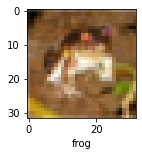

In [ ]:
plot_sample(x_train,y_train,0)

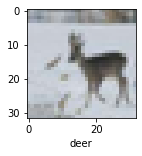

In [ ]:
plot_sample(x_train,y_train,20)

***Preprocessing***

In [ ]:
# Now we want to normalize our data
# we divide each pixel by 255 coz pixel ranges from 0 to 255 so to normalize them  into 0 to 1 

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
ann= models.Sequential([
                        layers.Flatten(input_shape=(32,32,3)),   #flatten layer is a first layer which accept 32 by 32 by 3
                        layers.Dense(3000,activation='relu'),
                        layers.Dense(1000,activation='relu') , # we have 2 deep layers one having 3k neurons and other have 1k neurons
                        layers.Dense(10,activation='softmax')  # last  layer have 10 coz we have 10 categories

])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']             
            )

ann.fit(x_train,y_train,epochs=5) 

Epoch 1/5
1563/1563 [==============================] - 111s 71ms/step - loss: 1.8123 - accuracy: 0.3544
Epoch 2/5
1563/1563 [==============================] - 109s 69ms/step - loss: 1.6273 - accuracy: 0.4262
Epoch 3/5
1563/1563 [==============================] - 111s 71ms/step - loss: 1.5426 - accuracy: 0.4584
Epoch 4/5
1563/1563 [==============================] - 115s 74ms/step - loss: 1.4838 - accuracy: 0.4775
Epoch 5/5
1563/1563 [==============================] - 109s 70ms/step - loss: 1.4346 - accuracy: 0.4965


In [ ]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 9s 27ms/step - loss: 1.4624 - accuracy: 0.4761


[1.4623831510543823, 0.47609999775886536]

In [ ]:
cnn= models.Sequential([
                      #cnn
                      layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(32,32,3)), #convolution is detecting the features in your image 
                      layers.MaxPooling2D((2,2)),  
                      #is a type of operation that is typically added to CNNs following individual convolutional layers.
                      # When added to a model, max pooling reduces the dimensionality of images by reducing the number of pixels in the output 
                      #from the previous convolutional layer    
                      
                      layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),       #convolution is detecting the features in your image 
                      layers.MaxPooling2D((2,2)),      

                        #dense
                        layers.Flatten(),   
                        layers.Dense(3000,activation='relu'),                        
                        layers.Dense(10,activation='softmax')  # last  layer have 10 coz we have 10 categories

])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
            
            )

cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 113s 72ms/step - loss: 1.3614 - accuracy: 0.5135
Epoch 2/5
1563/1563 [==============================] - 112s 71ms/step - loss: 0.9943 - accuracy: 0.6525
Epoch 3/5
1563/1563 [==============================] - 113s 72ms/step - loss: 0.7879 - accuracy: 0.7261
Epoch 4/5
1563/1563 [==============================] - 112s 72ms/step - loss: 0.5959 - accuracy: 0.7930
Epoch 5/5
1563/1563 [==============================] - 111s 71ms/step - loss: 0.4030 - accuracy: 0.8602


In [ ]:
# hyper tunning

In [ ]:
def build_model(dropout_rate):
  modeel=keras.Sequential()     # coz we need to add all the layers in sequence
  modeel.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3))),       
  modeel.add(layers.MaxPooling2D((2,2))),            
  
  modeel.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu')),
  modeel.add(layers.MaxPooling2D((2,2))),

  modeel.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu')),
  modeel.add(layers.MaxPooling2D((2,2))),
   
  modeel.add(layers.Flatten()),
  modeel.add(layers.Dense(3000,activation='relu'))
  modeel.add(layers.Dropout(dropout_rate))
  modeel.add(layers.Dense(10,activation='softmax'))
  modeel.compile(optimizer='adam',                
              #loss='sparse_categorical_crossentropy',  
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False, reduction="auto", name="sparse_categorical_crossentropy"
                )    ,                                          
              metrics=['accuracy'] )
  return modeel 

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

moodel=KerasClassifier(build_fn=build_model,verbose=1)

dropout_rate=[0.1,0.2,0.3,0.4,0.6]
epochs=[5]


paramgrid=dict(dropout_rate=dropout_rate,epochs=epochs)

grid=GridSearchCV(estimator=moodel,param_grid=paramgrid,cv=3)



In [ ]:
grid_result=grid.fit(x_train,y_train)

Epoch 1/5
1042/1042 [==============================] - 85s 81ms/step - loss: 1.6217 - accuracy: 0.4008
Epoch 2/5
1042/1042 [==============================] - 84s 80ms/step - loss: 1.2676 - accuracy: 0.5470
Epoch 3/5
1042/1042 [==============================] - 84s 80ms/step - loss: 1.1005 - accuracy: 0.6083
Epoch 4/5
1042/1042 [==============================] - 84s 81ms/step - loss: 0.9910 - accuracy: 0.6484
Epoch 5/5
521/521 [==============================] - 11s 20ms/step - loss: 1.0148 - accuracy: 0.6457
Epoch 1/5
1042/1042 [==============================] - 85s 81ms/step - loss: 1.5656 - accuracy: 0.4265
Epoch 2/5
1042/1042 [==============================] - 90s 86ms/step - loss: 1.1987 - accuracy: 0.5697
Epoch 3/5
1042/1042 [==============================] - 87s 83ms/step - loss: 1.0398 - accuracy: 0.6324
Epoch 4/5
1042/1042 [==============================] - 86s 83ms/step - loss: 0.9186 - accuracy: 0.6776
Epoch 5/5
521/521 [==============================] - 12s 22ms/step - loss: 

In [ ]:
# summarise result
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.666720 using {'dropout_rate': 0.4, 'epochs': 5}
0.643340 (0.005232) with: {'dropout_rate': 0.1, 'epochs': 5}
0.666600 (0.007211) with: {'dropout_rate': 0.2, 'epochs': 5}
0.658460 (0.007761) with: {'dropout_rate': 0.3, 'epochs': 5}
0.666720 (0.001617) with: {'dropout_rate': 0.4, 'epochs': 5}
0.648520 (0.011302) with: {'dropout_rate': 0.6, 'epochs': 5}
